<a href="https://colab.research.google.com/github/siriusted/gym-dssat-notebooks/blob/master/SB3_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym-DSSAT x Stable-Baselines3 Tutorial

Welcome to a brief introduction to using gym-dssat with stable-baselines3.

For a background or more details about using stable-baselines3 for reinforcement learning, please take a look [here](https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3)

In this notebook, we will assume familiarity with reinforcement learning and stable-baselines3. Thus the focus is on interacting with gym-dssat using SB3.

Next we proceed with installations

**Note**: It will take a while

# Installation

- gym-dssat

In [1]:
# install system dependencies
!apt-get update &> /dev/null
!apt-get install python3.7-dev python3.7-venv &> /dev/null
!wget http://pyyaml.org/download/libyaml/yaml-0.2.5.tar.gz &> /dev/null
!tar -xf yaml-0.2.5.tar.gz &> /dev/null 
!cd yaml-0.2.5 && ./configure &> /dev/null && make &> /dev/null && make install &> /dev/null


# install pip dependencies 
# only need gym==0.18.3, pyyaml > 5.1
!pip install gym==0.18.3 &> /dev/null
!pip install -U PyYAML &> /dev/null


# install pdi
!git clone https://gitlab.maisondelasimulation.fr/pdidev/pdi.git &> /dev/null
!mkdir pdi/build && cd pdi/build && cmake -DCMAKE_INSTALL_PREFIX='/opt/pdi' \
    -DDIST_PROFILE=User \
    -DCMAKE_VERBOSE_MAKEFILE=ON \
    -DBUILD_CFG_VALIDATOR=OFF \
    -DBUILD_DECL_HDF5_PLUGIN=OFF \
    -DBUILD_DECL_NETCDF_PLUGIN=OFF \
    -DBUILD_DECL_SION_PLUGIN=OFF \
    -DBUILD_FLOWVR_PLUGIN=OFF \
    -DBUILD_FORTRAN=ON \
    -DBUILD_FTI_PLUGIN=OFF \
    -DBUILD_HDF5_PARALLEL=OFF \
    -DBUILD_MPI_PLUGIN=OFF \
    -DBUILD_PYCALL_PLUGIN=ON \
    -DBUILD_PYTHON=ON \
    -DBUILD_SET_VALUE_PLUGIN=ON \
    -DBUILD_SERIALIZE_PLUGIN=ON \
    -DBUILD_SHARED_LIBS=ON \
    -DBUILD_TEST_PLUGIN=OFF \
    -DBUILD_TRACE_PLUGIN=ON \
    -DBUILD_USER_CODE_PLUGIN=ON \
    -DUSE_DEFAULT=EMBEDDED .. &> /dev/null

!cd pdi/build && make install &> /dev/null


# install dssat-pdi
!git clone --recurse-submodules https://gitlab.inria.fr/rgautron/gym_dssat_pdi.git &> /dev/null
!cd gym_dssat_pdi/dssat-csm-os && mkdir build && cd build \
    && cmake -DCMAKE_INSTALL_PREFIX='/opt/dssat_pdi' -DUSE_DEFAULT=EMBEDDED -DCMAKE_PREFIX_PATH='/opt/pdi/share/paraconf/cmake;/opt/pdi/share/pdi/cmake' .. &> /dev/null
!cd gym_dssat_pdi/dssat-csm-os/build && make &> /dev/null && make install &> /dev/null
!cd gym_dssat_pdi/dssat-csm-data &&  cp -r ./* /opt/dssat_pdi


# install gym-dssat
!cd gym_dssat_pdi/gym-dssat-pdi/ && pip install -e . &> /dev/null

- Stable-Baselines3


In [1]:
!pip install stable-baselines3[extra] &> /dev/null

All set! 

Next, we will train a PPO agent using stable-baselines3. This agent will be compared to two hardcoded agents, namely a Null agent and an Expert agent.

Also, to use gym-dssat properly, we need to run commands using `pdirun`. As a result, the source code for the rest of the tutorial has been collected into a script, which we will fetch next, then run. 

In [46]:
!wget https://raw.githubusercontent.com/siriusted/gym-dssat-notebooks/master/sb_example.py

--2022-01-24 16:32:20--  https://raw.githubusercontent.com/siriusted/gym-dssat-notebooks/master/sb_example.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5904 (5.8K) [text/plain]
Saving to: ‘sb_example.py’

sb_example.py       100%[===================>]   5.77K  --.-KB/s    in 0s      

2022-01-24 16:32:20 (62.1 MB/s) - ‘sb_example.py’ saved [5904/5904]



Run example. Note that this will take some time. You can take a look at `sb_example.py` in the file browser here on colab

In [47]:
!/opt/pdi/bin/pdirun python sb_example.py

Environment loaded for PDI version 1.5.0-alpha.2021-12-04.4a0ebfc
Training PPO agent...
Training done
Evaluating PPO agent...
Done
Evaluating Expert agent...
Done


Next, we will load and display the results from the script which have been stored in `results.pkl`

In [48]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_results(data):
    data_dict = {}
    for label, returns in data:
        data_dict[label] = returns
    df = pd.DataFrame(data_dict)
    
    ax = sns.boxplot(data=df)
    ax.set_xlabel("policy")
    ax.set_ylabel("evaluation output")
    plt.show()

with open("results.pkl", "rb") as result_file:
    results = pickle.load(result_file)

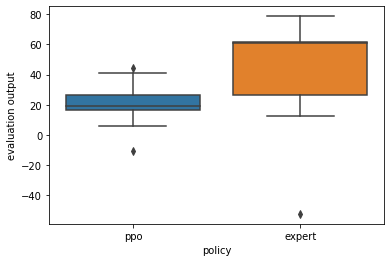

In [49]:
plot_results(results)

All done! Go ahead and edit `sb_example.py` in the integrated editor, then re-run the code cell above to observe results